# Weather Analysis - Records for South America

The data comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)



The main focus of this mini project is to produce a visual comparing records high and low temperatures for the specified regions by day of the year over the period 2005-2014 using a line graph. Shading the area in between those records and overlay a scatter plot whenever the day in 2015 had broken the previous 10-year record.

Concepts related to Tufte and Cairo's works concerning Chart Junk and what could be considered good practices in plotting and charting are explored.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(13,'570fb18cde0c9766865e6670ce2c11b0562a81415c535e51441176a2')

In [2]:
file  = '570fb18cde0c9766865e6670ce2c11b0562a81415c535e51441176a2.csv'
table = pd.read_csv(file)

In [3]:
table.sample(5)

,ID,Date,Element,Data_Value
118597,PA000086297,2010-07-18,TMAX,134
283954,ARM00087320,2005-06-06,TMAX,214
309255,UY000086360,2007-02-07,TMAX,322
234185,PAM00086065,2006-09-05,TMIN,1
281102,ARM00087467,2009-05-08,TMIN,89


In [4]:
print(table.info())
print(table.describe())
table.Date = pd.to_datetime(table.Date)
table = table.set_index('Date')
#Eliminating 29th February (leap days)
table = table[~((table.index.day == 29) & (table.index.month == 2))]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363665 entries, 0 to 363664
Data columns (total 4 columns):
ID            363665 non-null object
Date          363665 non-null object
Element       363665 non-null object
Data_Value    363665 non-null int64
dtypes: int64(1), object(3)
memory usage: 11.1+ MB
None
          Data_Value
count  363665.000000
mean      208.780042
std        92.728526
min      -120.000000
25%       150.000000
50%       206.000000
75%       281.000000
max       467.000000


In [5]:
#Transforming from tenths of Degrees C to Degrees.
table.Data_Value = table.Data_Value/10

In [6]:
table_u_15 = table[(table.index.year < 2015)]

In [7]:
tmin = table_u_15[table_u_15['Element'] == 'TMIN']
tmax = table_u_15[table_u_15['Element'] == 'TMAX'] 

In [8]:
tmax_mean = tmax.groupby([tmax.index.month,tmax.index.day]).Data_Value.max()
tmin_mean = tmin.groupby([tmin.index.month,tmin.index.day]).Data_Value.min()
total = pd.concat([tmin_mean,tmax_mean],axis=1)
total.columns = ['min_temp','max_temp']
#total.reset_index(drop=True)


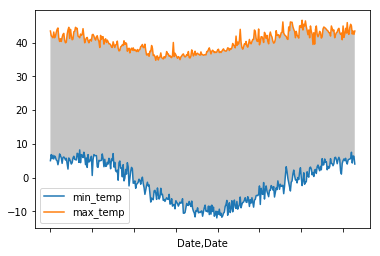

In [9]:
total.plot()
plt.gca().fill_between(range(len(total.index)),total['min_temp'],total['max_temp'], 
                       facecolor='grey', 
                       alpha=0.45)
plt.show()

In [10]:
t_15 = table[table.index.year >= 2015]
t_15_min = t_15[t_15['Element'] =='TMIN']
t_15_max = t_15[t_15['Element'] =='TMAX']

In [11]:
tot_15_min = t_15_min.groupby([t_15_min.index.month,t_15_min.index.day]).Data_Value.min()
tot_15_max = t_15_max.groupby([t_15_max.index.month,t_15_max.index.day]).Data_Value.max()

In [12]:
df = pd.DataFrame({'15_min':tot_15_min, '15_max': tot_15_max,'04-14_min':tmin_mean,'04-14_max':tmax_mean})

In [13]:
df['max_record'] = np.where(df['15_max']>df['04-14_max'],df['15_max'],np.nan)
df['min_record'] = np.where(df['15_min']<df['04-14_min'],df['15_min'],np.nan)

In [14]:
df.index.rename(['Month', 'Day'],inplace=True)

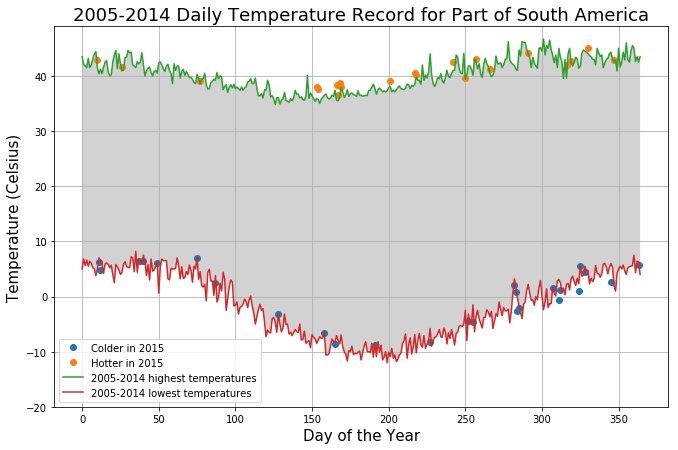

In [15]:
plt.figure(figsize=(11,7))

plt.plot(df.reset_index(drop=True).index,df['min_record'],'o',df.reset_index(drop=True).index,df['max_record'],'o',df.reset_index(drop=True).index,df['04-14_max'],'-',df.reset_index(drop=True).index,df['04-14_min'],'-')
plt.fill_between(range(len(df.index)),df['04-14_min'],df['04-14_max'], 
                       facecolor='grey', 
                       alpha=0.35)
ax = plt.gca()
ax.legend(['Colder in 2015', 'Hotter in 2015', '2005-2014 highest temperatures',
            '2005-2014 lowest temperatures'],loc='lower left', frameon=True)
plt.title('2005-2014 Daily Temperature Record for Part of South America',size=18)
ax.set_ylabel('Temperature (Celsius)',size=15)
ax.set_xlabel('Day of the Year',size=15)
ax.set_ylim([-20,49])

ax.grid(True)

plt.savefig('PRB2.png')

plt.show()